In [1]:
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
from radar import radar2, norm_df, radar
import pandas as pd

In [2]:
data = pd.read_hdf('combined_maf_dataframe.hdf')

In [3]:
data.columns

Index(['runName', 'version', 'parallax_best18k', 'properMotion_best18k',
       'fO_fONv MedianNvis', 'fO_fOArea', 'median_coadd_u', 'median_coadd_g',
       'median_coadd_r', 'median_coadd_i', 'median_coadd_z', 'median_coadd_y',
       'SNIa_PrePeak_Mean', 'Fast Microlensing_Mean', 'Slow Microlensing_Mean',
       'KN_PrePeak_Mean', 'GalaxyCountsMetric_extended_N Galaxies (all)',
       'TDEsPopMetric__some_color_Mean', 'TDEsPopMetric__some_color_pu_Mean',
       'WeakLensingNvisits fiveSigmaDepth, visitExposureTime%_Median',
       'Nstars_no_crowding_Total N Stars, no crowding',
       'ExgalM5_with_cuts_3x2ptFoM', 'DD:ELAISS1,u', 'DD:XMM-LSS,u',
       'DD:ECDFS,u', 'DD:COSMOS,u', 'DD:EDFS,u', 'DD:EDFSa,u', 'DD:EDFSb,u',
       'DD:ELAISS1,g', 'DD:XMM-LSS,g', 'DD:ECDFS,g', 'DD:COSMOS,g',
       'DD:EDFS,g', 'DD:EDFSa,g', 'DD:EDFSb,g', 'DD:ELAISS1,r', 'DD:XMM-LSS,r',
       'DD:ECDFS,r', 'DD:COSMOS,r', 'DD:EDFS,r', 'DD:EDFSa,r', 'DD:EDFSb,r',
       'DD:ELAISS1,i', 'DD:XMM-LSS,i', '

In [4]:
cols = ['runName', 'parallax_best18k', 'properMotion_best18k', 'fO_fONv MedianNvis',
        'SNIa_PrePeak_Mean',
        'TDEsPopMetric__some_color_pu_Mean',
        'WeakLensingNvisits fiveSigmaDepth, visitExposureTime%_Median',
        'ExgalM5_with_cuts_3x2ptFoM',
        'Fast Microlensing_Mean', 'GalaxyCountsMetric_extended_N Galaxies (all)',
        'Nstars_no_crowding_Total N Stars, no crowding',
       'NEO bright', 'NEO faint', 'TNO']#,
#        '3 pairs in 15 nights detection loss NEO H=16.0',
#        '3 pairs in 30 nights detection loss NEO H=22.0',
#       '3 pairs in 15 nights detection loss TNO H=4.0']

linear_cols = []#['SNIa_PrePeak_Mean',
           #'TDEsPopMetric__some_color_pu_Mean',
           #'Fast Microlensing_Mean',
           #'3 pairs in 15 nights detection loss NEO H=16.0',
           #'3 pairs in 30 nights detection loss NEO H=22.0',
           #'3 pairs in 15 nights detection loss TNO H=4.0']

mag_cols = ['runName', 'median_coadd_u', 'median_coadd_g',
           'median_coadd_r', 'median_coadd_i',
            'median_coadd_z', 'median_coadd_y']


name_mapper = {'runName': 'runName', 'parallax_best18k': 'Parallax', 'properMotion_best18k': 'Proper Motion',
       'fO_fONv MedianNvis': 'fO N', 'SNIa_PrePeak_Mean': 'SNeIa', 'Fast Microlensing_Mean': 'Fast Micro L',
       'Slow Microlensing_Mean': 'Slow Micro L',
        'TDEsPopMetric__some_color_Mean': 'TDE',
               'TDEsPopMetric__some_color_pu_Mean':'TDE',
               'WeakLensingNvisits fiveSigmaDepth, visitExposureTime%_Median': 'WL',
               'ExgalM5_with_cuts_3x2ptFoM': '3x2FoM',
       'GalaxyCountsMetric_extended_N Galaxies (all)': 'N Gals',
       'Nstars_no_crowding_Total N Stars, no crowding': 'N Stars',
       '3 pairs in 15 nights detection loss NEO H=16.0': 'NEO, bright',
               '3 pairs in 30 nights detection loss NEO H=22.0':'NEO, faint',
        '3 pairs in 15 nights detection loss TNO H=6.0':' TNO',
              'NEO bright': 'NEO, bright', 'NEO faint': 'NEO, faint',
              'TNO': 'TNO'}

mag_name_mapper = {'runName': 'runName', 'median_coadd_u': 'u', 'median_coadd_g': 'g',
       'median_coadd_r': 'r', 'median_coadd_i': 'i', 'median_coadd_z': 'z', 'median_coadd_y': 'y'}

In [5]:
data['runName']


0    baseline_nexp2
1      pause2_pl183
2       pause2_pl91
3            pause3
4         pause_sim
Name: runName, dtype: object

In [6]:
runs = ['baseline_nexp2'] + [name for name in data['runName'].values if 'pause' in name]
runs

['baseline_nexp2', 'pause2_pl183', 'pause2_pl91', 'pause3', 'pause_sim']

In [7]:
data_normed = norm_df(data, runs, cols, mag_cols=linear_cols,
                      invert_cols=['parallax_best18k', 'properMotion_best18k'], norm_run='baseline_nexp2')
data_normed = data_normed.rename(columns=name_mapper)

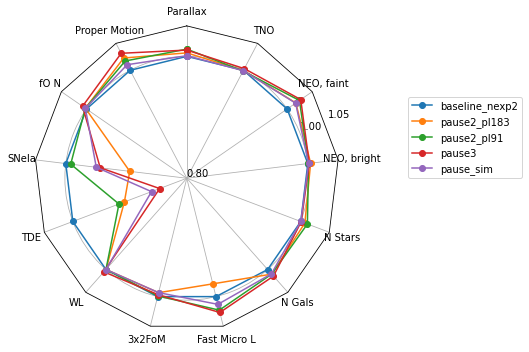

In [8]:
fig, ax = radar(data_normed, legend=True, rgrids=[0.80, 1.0, 1.05])
fig.tight_layout()
#fig.savefig('radar_plots/even_filt_radar.pdf')

In [9]:
data_normed

,runName,Parallax,Proper Motion,fO N,SNeIa,TDE,WL,3x2FoM,Fast Micro L,N Gals,N Stars,"NEO, bright","NEO, faint",TNO
0,baseline_nexp2,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,pause2_pl183,1.005724,1.022774,1.002252,0.894309,0.909524,1.000000,0.993357,0.978431,1.010079,1.007208,1.004610,1.017427,0.999688
2,pause2_pl91,1.011859,1.017316,1.002252,0.991870,0.919048,1.000000,0.998806,1.022876,1.010090,1.011627,1.001098,1.024603,0.998752
3,pause3,1.010290,1.031567,1.007883,0.943089,0.847619,1.005128,0.996678,1.026797,1.014440,1.000706,1.002415,1.027166,1.003121
4,pause_sim,1.001082,1.010411,1.002252,0.949593,0.861905,1.000000,0.993253,1.013072,1.009427,1.000036,1.001317,1.016914,0.999376


# note the u-band throughputs changed. The baseline is ~0.1 mags shallower in u. Doesn't change much in the science metrics, but looks odd here. The point is everything is within ~1% on final depths.

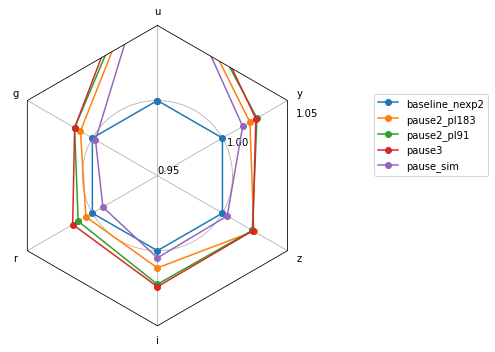

In [10]:
data_normed = norm_df(data, runs, mag_cols, norm_run='baseline_nexp2',
                      invert_cols=None, mag_cols='all')
data_normed = data_normed.rename(columns=mag_name_mapper)

fig, ax = radar(data_normed, legend=True, rgrids=[.95, 1.0, 1.05], alpha=.1)
fig.tight_layout()

In [11]:
data_normed

,runName,u,g,r,i,z,y
0,baseline_nexp2,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,pause2_pl183,1.108770,1.009175,1.004987,1.011460,1.024106,1.021135
2,pause2_pl91,1.111889,1.013673,1.010880,1.022354,1.022958,1.026563
3,pause3,1.126765,1.013642,1.015119,1.024009,1.023372,1.025685
4,pause_sim,1.109011,0.997612,0.991902,1.004802,1.003697,1.015566


Quick hits looking at what happens if we pause the survey for 6 months, then resume:

Note:  pause_sim is the first attempt where the footprint object didn't know there was a pause, so it pushed to higher airmass to try and recover.  The run pasue2_pl91 is a 91 day pause after 2 years, and pause2_pl183 is a 183 day pause after 2 years (both using a smarter footprint so it "knows" it will have time to recover after year 10).

Pretty much as expected, the SNe and TDE transients suffer because of the interupted observing season. Proper motions see a slight boost because of the longer baseline of observations for part of the sky. Faint NEOs get 1-2% better in the paused sims. Because NEOs can have orbits similar to earth, a longer survey means more NEOs can become visible.

The pause3 run is 3 61-day pauses. That does a little to mitigate the impact on SNe, but hurts TDEs more. So lots of trade-offs.

If there needs to be a pause, a single 91-day pause looks like the clear winner with the lowest impact and nearly identical benefit compared to the other plans.

In [12]:
# Ugh, looks like there was a change in the u-band throughputs or zeropoint between running the baseline and running the pause sims!
